Usar el conjunto de entrenamiento y validación MINTS para entrenar un modelo de una capa y una neurona usando la función activación 'softmax', una función de perdidas "sparse_categorical_crossentropy" y la metrica 'accuracy'

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7952 - loss: 0.8625 - val_accuracy: 0.8789 - val_loss: 0.5084
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8742 - loss: 0.4900 - val_accuracy: 0.8918 - val_loss: 0.4175
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8850 - loss: 0.4282 - val_accuracy: 0.8998 - val_loss: 0.3815
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8922 - loss: 0.3976 - val_accuracy: 0.9017 - val_loss: 0.3616
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8961 - loss: 0.3785 - val_accuracy: 0.9057 - val_loss: 0.3477
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8987 - loss: 0.3648 - val_accuracy: 0.9073 - val_loss: 0.3381
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9010 - loss: 0.3547 - val_accuracy: 0.9106 - val_loss: 0.3306
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9038 - loss: 0.346

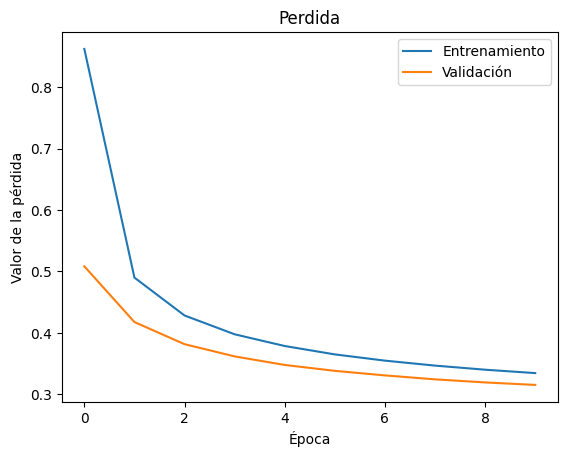

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicción del primer numero (5 en la imagen): [[8.2478747e-03 2.5010969e-09 7.2016668e-01 2.4716938e-01 1.4199454e-06
  2.0875536e-02 6.4758315e-05 5.2796840e-04 2.9458508e-03 5.5565783e-07]]
Predicción del primer numero (8 en la imagen): [[8.77035316e-03 8.37548697e-09 6.43114865e-01 7.74555504e-02
  1.01718797e-06 2.53125370e-01 4.66000149e-03 1.40153721e-03
  1.14490595e-02 2.20933707e-05]]


In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Cargamos los datos MNIST con la tipiica:
(x_entr, y_entr), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

#Donde entr=entrenamiento y test=prueba

# Normalizamos:
x_entr = x_entr / 255.0
x_test = x_test / 255.0

# "Aplanamos" las imágenes
x_entr = x_entr.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Definimos el modelo como una capa con 10 neuronas porque son 10 numeros del 0 al 9
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='softmax', input_shape=(784,)) #28*28=784
])

#Compilamos el modelo con los parametros dados en la tarea
modelo.compile(
    optimizer='sgd',  # descenso estocástico
    loss='sparse_categorical_crossentropy', #funcion de perdidas
    metrics=['accuracy']
)

# Entrenamos modelo
hist = modelo.fit(
    x_entr, y_entr,
    epochs=10,
    batch_size=32,
    validation_split=0.2  # separar parte de entrenamiento como validación
)

#graficamos la perdida para ver si lo hicimos bien
plt.plot(hist.history['loss'], label='Entrenamiento')
plt.plot(hist.history['val_loss'], label='Validación')
plt.xlabel("Época")
plt.ylabel("Valor de la pérdida")
plt.title("Perdida")
plt.legend()
plt.show()


#Ahora probamos con una imagen descargada de internet. Pero habra que procesarla primero

cinco = Image.open(r"C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\Img\numero5.webp").convert("L")  # "L" = escala de grises
ocho = Image.open(r"C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\Img\numero8.webp").convert("L") 
cinco_dim = cinco.resize((28, 28))
ocho_dim = ocho.resize((28, 28))

cinco_array = np.array(cinco_dim)
ocho_array = np.array(ocho_dim) 

norm5 = cinco_array / 255.0  
norm8 = ocho_array / 255.0

fin5 = norm5.reshape(1, 784)
fin8 = norm8.reshape(1, 784)

prediccion1 = modelo.predict(fin5)
etiqueta1 = np.argmax(prediccion1)
prediccion2 = modelo.predict(fin8)
etiqueta2 = np.argmax(prediccion2)

# Mostramos los resultados
print("Predicción del primer numero (5 en la imagen):", prediccion1)
print("Predicción del primer numero (8 en la imagen):", prediccion2)

